In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import os

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [7]:
train_set = datasets.MNIST(root = " ",
                            train = True,
                            transform= transforms.ToTensor(),
                            download=True)

test_set = datasets.MNIST(root = " ",
                            train = False,
                            transform= transforms.ToTensor(),
                            download=True)


In [8]:
train_loader = DataLoader(train_set, batch_size=64, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 64, shuffle = False)

In [ ]:
class ANN(nn.Module):
  def __init__(self):
    super(ANN,self).__init__()
    self.fc1 = nn.Linear(28*28 , 64)
    self.fc2 = nn.Linear(64,128)
    self.fc3 = nn.Linear(128,256)
    self.fc4 = nn.Linear(256, 10)
    self.activation = nn.ReLU()

  def forward(self, x):
    out = x.view(-1, 28*28) 
    out = self.fc1(out)
    out = self.activation(out)
    out = self.fc2(out)
    out = self.activation(out)
    out = self.fc3(out)
    out = self.activation(out)
    out = self.fc4(out)
    return out

In [10]:
model = ANN().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 10
training_loss = []
testing_loss = []
training_acc = []
testing_acc = []

In [11]:
for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    model.train()

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device) 
        optimizer.zero_grad()
        output = model(images)

        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()

        prediction = torch.argmax(output, 1)
        train_acc += (prediction == labels).sum().item()
        train_loss += loss.item()

    training_acc.append(train_acc / len(train_set))
    training_loss.append(train_loss / len(train_loader))

    test_loss = 0.0
    test_acc = 0.0
    model.eval()

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)

            output = model(images)
            loss = loss_fn(output, labels)
            prediction = torch.argmax(output, 1)

            test_acc += (prediction == labels).sum().item()
            test_loss += loss.item()

    testing_acc.append(test_acc / len(test_set))
    testing_loss.append(test_loss / len(test_loader))

    print(f"Epoch {epoch+1}: Training Accuracy: {train_acc/len(train_set):.2f}, "
          f"Testing Accuracy: {test_acc/len(test_set):.2f}, Training Loss: {train_loss/len(train_loader):.2f}, "
          f"Testing Loss: {test_loss/len(test_loader):.2f}")

Epoch 1: Training Accuracy: 0.90, Testing Accuracy: 0.95, Training Loss: 0.33, Testing Loss: 0.16
Epoch 2: Training Accuracy: 0.96, Testing Accuracy: 0.96, Training Loss: 0.13, Testing Loss: 0.12
Epoch 3: Training Accuracy: 0.97, Testing Accuracy: 0.97, Training Loss: 0.10, Testing Loss: 0.10
Epoch 4: Training Accuracy: 0.98, Testing Accuracy: 0.97, Training Loss: 0.08, Testing Loss: 0.10
Epoch 5: Training Accuracy: 0.98, Testing Accuracy: 0.97, Training Loss: 0.06, Testing Loss: 0.09
Epoch 6: Training Accuracy: 0.98, Testing Accuracy: 0.97, Training Loss: 0.05, Testing Loss: 0.08
Epoch 7: Training Accuracy: 0.99, Testing Accuracy: 0.97, Training Loss: 0.05, Testing Loss: 0.09
Epoch 8: Training Accuracy: 0.99, Testing Accuracy: 0.98, Training Loss: 0.04, Testing Loss: 0.07
Epoch 9: Training Accuracy: 0.99, Testing Accuracy: 0.98, Training Loss: 0.03, Testing Loss: 0.09
Epoch 10: Training Accuracy: 0.99, Testing Accuracy: 0.97, Training Loss: 0.03, Testing Loss: 0.09


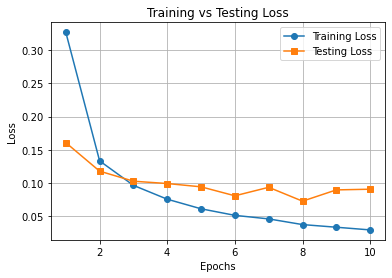

In [12]:
plt.plot(range(1, epochs + 1), training_loss, label="Training Loss", marker='o')
plt.plot(range(1, epochs + 1), testing_loss, label="Testing Loss", marker='s')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Testing Loss")
plt.legend()
plt.grid()
plt.show()